In [37]:
import tensorflow as tf
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

# 1. 데이터 가져오기 및 전처리

In [38]:
# 마늘 데이터 가져오기
raw_garlic = pd.read_csv('C:/sa/garlic.csv')

# object 타입 쉼표 제거
columns_to_convert = ['exchangeRate', 'retailPrice', 'wholesalePrice', 'exportVolume', 'exportValue', 'importVolume', 'importValue']
for col in columns_to_convert:
    raw_garlic[col] = raw_garlic[col].str.replace(',', '')

# 숫자형으로 변환, 변환할 수 없는 값은 NaN으로 설정
raw_garlic[columns_to_convert] = raw_garlic[columns_to_convert].apply(pd.to_numeric, errors='coerce')

raw_garlic.head()

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.0,0.7,3.5,4.9,13.0,6495,3540.0,0,0,2379700,1692118860,29480083.33
1,14-Feb,1071.0,1.9,6.6,1.8,16.2,6428,3436.0,0,0,2554740,1815962967,29480083.33
2,14-Mar,1071.0,7.9,13.1,3.5,7.2,6352,3279.0,0,0,4657565,3282345108,29480083.33
3,14-Apr,1045.0,14.0,19.6,9.4,31.0,6216,3398.0,500,3965775,2701740,1791522920,29480083.33
4,14-May,1025.0,18.9,25.3,13.8,63.0,6344,3497.0,13649,60124450,2248896,1580966150,29480083.33


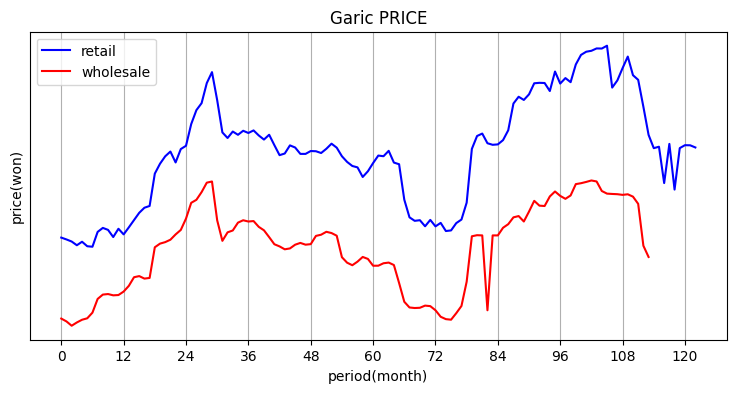

In [39]:
# 마늘 분포 확인하기
plt.figure(figsize = (9, 4))
plt.title('Garic PRICE')
plt.ylabel('price(won)')
plt.xlabel('period(month)')
plt.grid()
# x축을 12씩 표시, y축을 500단위로 표시
plt.xticks(range(0, 121, 12))
plt.yticks(range(0, 000, 500))

# 이제 데이터 추가
plt.plot(raw_garlic['retailPrice'], label='retail', color='b')
plt.plot(raw_garlic['wholesalePrice'], label='wholesale', color='r')
plt.legend(loc = 'best')
# 출력
plt.show()

In [40]:
# 최솟값이 0인 열이 있는지 확인
for col in raw_garlic.columns:

    if raw_garlic[col].min() == 0:
        col_name = col
        print(col_name, type(col_name))

rainfall <class 'str'>
exportVolume <class 'str'>
exportValue <class 'str'>
importVolume <class 'str'>
importValue <class 'str'>
production <class 'str'>


In [41]:
# 각 column에 0 몇개인지 확인
for col in raw_garlic.columns:

    missing_rows = raw_garlic.loc[raw_garlic[col]==0].shape[0]
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 2
retailPrice: 0
wholesalePrice: 0
exportVolume: 21
exportValue: 21
importVolume: 1
importValue: 1
production: 3


In [42]:
# 최솟값이 0인 열의 행 출력
raw_garlic.loc[(raw_garlic['rainfall'] == 0) |
                (raw_garlic['wholesalePrice'] == 0) |
                (raw_garlic['exportVolume'] == 0) | 
                (raw_garlic['exportValue'] == 0) | 
                (raw_garlic['importVolume'] == 0) | 
                (raw_garlic['importValue'] == 0) | 
                (raw_garlic['production'] == 0)]

,month,exchangeRate,avgTemp,maxTemp,minTemp,rainfall,retailPrice,wholesalePrice,exportVolume,exportValue,importVolume,importValue,production
0,14-Jan,1065.00,0.7,3.5,4.9,13.0,6495,3540.0,0,0,2379700,1692118860,29480083.33
1,14-Feb,1071.00,1.9,6.6,1.8,16.2,6428,3436.0,0,0,2554740,1815962967,29480083.33
2,14-Mar,1071.00,7.9,13.1,3.5,7.2,6352,3279.0,0,0,4657565,3282345108,29480083.33
6,14-Jul,1020.00,26.1,30.6,22.9,207.9,6162,3756.0,0,0,3220284,2323528380,29480083.33
8,14-Sep,1033.00,22.1,27.0,18.0,88.1,6849,4415.0,0,0,2423815,1873780393,29480083.33
16,15-May,1091.00,18.9,24.9,13.6,28.9,7585,4999.0,0,0,1814170,1813417651,22189333.33
19,15-Aug,1179.00,26.3,30.8,22.8,72.9,9191,6275.0,0,0,2249750,2753154819,22189333.33
23,15-Dec,1172.00,1.6,6.0,2.1,29.1,9727,6775.0,0,0,3572000,4351067580,22189333.33
27,16-Apr,1148.00,14.1,20.3,9.1,76.8,11401,8155.0,0,0,1981534,3196157132,22962416.67
29,16-Jun,1171.00,23.6,28.7,19.5,54.4,12534,8543.0,0,0,2374002,4322892875,22962416.67


In [43]:
# 결측치 처리위해 0을 모두 NaN으로 대체
raw_garlic['rainfall'] = raw_garlic['rainfall'].replace(0, np.nan)
raw_garlic['wholesalePrice'] = raw_garlic['wholesalePrice'].replace(0, np.nan)
raw_garlic['exportVolume'] = raw_garlic['exportVolume'].replace(0, np.nan)
raw_garlic['exportValue'] = raw_garlic['exportValue'].replace(0, np.nan)
raw_garlic['importVolume'] = raw_garlic['importVolume'].replace(0, np.nan)
raw_garlic['importValue'] = raw_garlic['importValue'].replace(0, np.nan)
raw_garlic['production'] = raw_garlic['production'].replace(0, np.nan)

# NaN으로 잘 바뀌었나 확인
for col in raw_garlic.columns:
    missing_rows = raw_garlic.loc[raw_garlic[col]==0].shape[0]    # 0의 수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
exportVolume: 0
exportValue: 0
importVolume: 0
importValue: 0
production: 0


In [44]:
# 결측치의 개수가 적은 열은 평균값으로 대체
raw_garlic.loc[np.isnan(raw_garlic.rainfall)==True, 'rainfall'] = raw_garlic.rainfall.mean()
raw_garlic.loc[np.isnan(raw_garlic.wholesalePrice)==True, 'wholesalePrice'] = raw_garlic.wholesalePrice.mean()
raw_garlic.loc[np.isnan(raw_garlic.importVolume)==True, 'importVolume'] = raw_garlic.importVolume.mean()
raw_garlic.loc[np.isnan(raw_garlic.importValue)==True, 'importValue'] = raw_garlic.importValue.mean()
raw_garlic.loc[np.isnan(raw_garlic.production)==True, 'production'] = raw_garlic.production.mean()

# 결측치의 개수가 많은 열은 삭제
raw_garlic.drop(columns=['exportVolume'], inplace=True)
raw_garlic.drop(columns=['exportValue'], inplace=True)

# 결측치 제거가 잘 되었나 확인
for col in raw_garlic.columns:
    missing_rows = raw_garlic[col].isna().sum()     # NaN 값 개수 계산
    print(col + ': ' + str(missing_rows))

month: 0
exchangeRate: 0
avgTemp: 0
maxTemp: 0
minTemp: 0
rainfall: 0
retailPrice: 0
wholesalePrice: 0
importVolume: 0
importValue: 0
production: 0


In [45]:
# 숫자로 표현되는 모든 column에 대해서 0~1로 정규화를 수행함.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scale_cols2 = ['exchangeRate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall', 'retailPrice', 'wholesalePrice', 'importVolume', 'importValue', 'production']
scaled_garlic = scaler.fit_transform(raw_garlic[scale_cols2])

scaled_garlic = pd.DataFrame(scaled_garlic, columns=scale_cols2)
print(scaled_garlic)

     exchangeRate   avgTemp   maxTemp  minTemp  rainfall  retailPrice  \
0        0.112745  0.017483  0.102410    0.188  0.017786     0.045393   
1        0.127451  0.059441  0.195783    0.064  0.022529     0.036260   
2        0.127451  0.269231  0.391566    0.132  0.009189     0.025900   
3        0.063725  0.482517  0.587349    0.368  0.044464     0.007361   
4        0.014706  0.653846  0.759036    0.544  0.091893     0.024809   
..            ...       ...       ...      ...       ...          ...   
118      0.713235  0.230769  0.343373    0.108  0.119905     0.284351   
119      0.698529  0.031469  0.153614    0.092  0.125834     0.490594   
120      0.746495  0.010490  0.105422    0.148  0.026530     0.505180   
121      0.766520  0.125874  0.243976    0.000  0.109234     0.504635   
122      0.763971  0.230769  0.349398    0.088  0.042834     0.493866   

     wholesalePrice  importVolume  importValue  production  
0          0.049236      0.138305     0.031837    0.720673  
1

# 2. feature값 설정

In [74]:
X = scaled_garlic[['exchangeRate', 'avgTemp', 'maxTemp','minTemp','rainfall', 'wholesalePrice', 'importVolume','importValue', 'production']]
y = scaled_garlic['retailPrice']
X_names = X.columns

X_names

Index(['exchangeRate', 'avgTemp', 'maxTemp', 'minTemp', 'rainfall',
       'wholesalePrice', 'importVolume', 'importValue', 'production'],
      dtype='object')

### feautre선택방법 1. f_regression

In [75]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression

sel_fr = SelectKBest(f_regression, k=4).fit(X, y)    # 왜 3개인가?? 
print('\nf_regression: ') #F-value 회귀

print()
print('Selected features: ', [X_names[i] for i in sel_fr.get_support(indices=True)]) 


f_regression: 

Selected features:  ['exchangeRate', 'wholesalePrice', 'importValue', 'production']


### feature선택방법 2. SFS

In [76]:
# SFS(Sequential Feature Selector) : 순차적으로 특성을 선택하는 방법  
# k 최근접 이웃 회귀 모델

from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select=3, direction='backward')

sfs.fit(X,y)

X_selected = sfs.transform(X)
X_selected_names = [X_names[i] for i in sfs.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['avgTemp', 'maxTemp', 'wholesalePrice']


### feature선택방법 3. rfe

In [77]:
# 모든 feature들로부터 feature를 하나하나 제거하면서 원하는 개수의 feature가 남을 때까지 반복하는

from sklearn.feature_selection import RFE ,RFECV
from sklearn.svm import SVR

estimator = SVR(kernel="linear")
selector = RFE(estimator, n_features_to_select=4, step=1)
selector = selector.fit(X, y)

X_selected = selector.transform(X)
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

print(f'{X_selected_names = }')
print()

X_selected_names = ['exchangeRate', 'maxTemp', 'wholesalePrice', 'importVolume']



### feature선택방법 4. rfecv

In [78]:
#rfecv를 사용하면 몇개의 feature를 남겨야할지 사용자가 직접 정의할 필요가 없음

estimator = SVR(kernel="linear")
selector = RFECV(estimator, step=1, cv=5)
selector = selector.fit(X, y)

X_selected = selector.transform(X)
X_selected_names = [X_names[i] for i in selector.get_support(indices=True)]

print(f'{X_selected_names = }')

X_selected_names = ['exchangeRate', 'maxTemp', 'wholesalePrice', 'importVolume', 'production']


# 3. feature분석을 바탕으로 한 학습데이터 선택

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = scaled_garlic[['exchangeRate', 'maxTemp', 'importVolume', 'wholesalePrice', 'production']]
y = scaled_garlic[['retailPrice']]

#학습데이터와 테스트데이터를 7:3으로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

# 4. LSTM

In [80]:
from keras.layers import LSTM, Dense, Dropout
from keras.models import Sequential
from keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=50, activation='tanh' ,input_shape=(4, 1)))
model.add(Dense(50, activation='tanh'))
model.add(Dropout(0.01))  
model.add(Dense(1))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])
model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 50)                  │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,001 (50.79 KB)

 Trainable params: 13,001 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

In [81]:
# 모델 학습
lstm= model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=2)

Epoch 1/500
9/9 - 3s - 278ms/step - loss: 0.1085 - mae: 0.2756 - val_loss: 0.1996 - val_mae: 0.4239
Epoch 2/500
9/9 - 0s - 11ms/step - loss: 0.0472 - mae: 0.1858 - val_loss: 0.0765 - val_mae: 0.2497
Epoch 3/500
9/9 - 0s - 9ms/step - loss: 0.0477 - mae: 0.1771 - val_loss: 0.1214 - val_mae: 0.3235
Epoch 4/500
9/9 - 0s - 9ms/step - loss: 0.0419 - mae: 0.1774 - val_loss: 0.1476 - val_mae: 0.3611
Epoch 5/500
9/9 - 0s - 9ms/step - loss: 0.0422 - mae: 0.1820 - val_loss: 0.1399 - val_mae: 0.3507
Epoch 6/500
9/9 - 0s - 10ms/step - loss: 0.0418 - mae: 0.1806 - val_loss: 0.1297 - val_mae: 0.3365
Epoch 7/500
9/9 - 0s - 9ms/step - loss: 0.0409 - mae: 0.1740 - val_loss: 0.1075 - val_mae: 0.3023
Epoch 8/500
9/9 - 0s - 10ms/step - loss: 0.0401 - mae: 0.1693 - val_loss: 0.1134 - val_mae: 0.3124
Epoch 9/500
9/9 - 0s - 9ms/step - loss: 0.0380 - mae: 0.1717 - val_loss: 0.1248 - val_mae: 0.3303
Epoch 10/500
9/9 - 0s - 8ms/step - loss: 0.0384 - mae: 0.1713 - val_loss: 0.1095 - val_mae: 0.3068
Epoch 11/500
9

In [82]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

y_train_np = y_train.values
y_test_np = y_test.values

scaler = MinMaxScaler()
scaler.fit(y_train_np.reshape(-1, 1))  # y_train 데이터로 fit 수행

# 예측값 계산
y_pred = model.predict(X_test).flatten()

# fit된 scaler를 사용하여 데이터를 원래 스케일로 변환
y_pred_inverse = scaler.inverse_transform(y_pred.reshape(-1,1))
y_test_inverse = scaler.inverse_transform(y_test_np.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step


In [83]:
# 수치로 평가하기 MAPE, MAE, RMSE
lstm_mape = (np.sum(np.abs(y_test_inverse-y_pred_inverse)/y_test_inverse)/len(y_test_inverse))*100  
lstm_mae = mean_absolute_error(y_test_np, y_pred_inverse)
lstm_rmse = np.sqrt(mean_squared_error(y_pred_inverse,y_test_np) )

acc_df = pd.DataFrame({'lstm':[lstm_mape, lstm_mae, lstm_rmse]}, index=['mape','mae','rmse'])
acc_df

# mape값은 10이하가 통상적으로 좋다는 취급을 받음. 

,lstm
mape,15.159656
mae,0.180458
rmse,0.194170


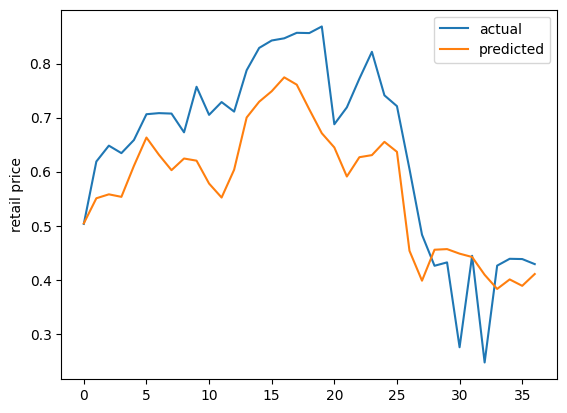

In [84]:
# 원래값으로 역스케일링한 값으로 그래프 그려보기.

plt.plot(y_test_inverse, label='actual')
plt.plot(y_pred_inverse, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


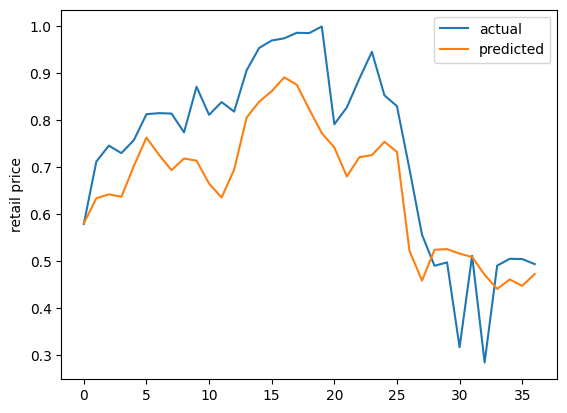

In [85]:
# 원래대로 스케일링한 값으로 그래프 그려보기.

y_pred = model.predict(X_test)
plt.plot(y_test_np, label='actual')
plt.plot(y_pred, label='predicted')

plt.ylabel('retail price')
plt.legend()
plt.show()

# 5. GRU

In [86]:
from keras.layers import LSTM, Dense, Dropout, GRU
from keras.models import Sequential
from keras.optimizers import Adam

gru_model = Sequential()
gru_model.add(GRU(units=50, activation='tanh' ,input_shape=(4, 1)))
gru_model.add(Dense(50, activation='tanh'))
gru_model.add(Dropout(0.01))  
gru_model.add(Dense(1))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
gru_model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])
gru_model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                          │ (None, 50)                  │           7,950 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 10,551 (41.21 KB)

 Trainable params: 10,551 (41.21 KB)

 Non-trainable params: 0 (0.00 B)

In [87]:
# 모델 학습
gru = gru_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=2)

Epoch 1/500
9/9 - 2s - 258ms/step - loss: 0.1310 - mae: 0.3022 - val_loss: 0.1872 - val_mae: 0.4094
Epoch 2/500
9/9 - 0s - 10ms/step - loss: 0.0470 - mae: 0.1747 - val_loss: 0.0782 - val_mae: 0.2498
Epoch 3/500
9/9 - 0s - 9ms/step - loss: 0.0501 - mae: 0.1782 - val_loss: 0.1333 - val_mae: 0.3419
Epoch 4/500
9/9 - 0s - 9ms/step - loss: 0.0429 - mae: 0.1832 - val_loss: 0.1588 - val_mae: 0.3770
Epoch 5/500
9/9 - 0s - 8ms/step - loss: 0.0415 - mae: 0.1770 - val_loss: 0.1204 - val_mae: 0.3254
Epoch 6/500
9/9 - 0s - 9ms/step - loss: 0.0359 - mae: 0.1646 - val_loss: 0.1068 - val_mae: 0.3059
Epoch 7/500
9/9 - 0s - 8ms/step - loss: 0.0329 - mae: 0.1577 - val_loss: 0.0919 - val_mae: 0.2826
Epoch 8/500
9/9 - 0s - 8ms/step - loss: 0.0308 - mae: 0.1532 - val_loss: 0.0929 - val_mae: 0.2864
Epoch 9/500
9/9 - 0s - 10ms/step - loss: 0.0267 - mae: 0.1462 - val_loss: 0.0791 - val_mae: 0.2635
Epoch 10/500
9/9 - 0s - 10ms/step - loss: 0.0244 - mae: 0.1370 - val_loss: 0.0615 - val_mae: 0.2305
Epoch 11/500
9

In [88]:
y_train_np = y_train.values
y_test_np = y_test.values

scaler = MinMaxScaler()
scaler.fit(y_train_np.reshape(-1, 1))

# gru 모델로 예측
gru_y_pred = gru_model.predict(X_test).flatten()

# 역스케일링
gru_y_pred_inverse = scaler.inverse_transform(gru_y_pred.reshape(-1,1))
gru_y_test_inverse = scaler.inverse_transform(y_test_np.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


In [89]:
# 평가치 구하기
gru_mape = (np.sum(np.abs(gru_y_test_inverse-gru_y_pred_inverse)/gru_y_test_inverse)/len(gru_y_test_inverse))*100
gru_mae = mean_absolute_error(y_test_np, gru_y_pred_inverse)
gru_rmse = np.sqrt(mean_squared_error(y_test_np, gru_y_pred_inverse))

gru_df = pd.DataFrame({'gru':[gru_mape, gru_mae, gru_rmse]}, index=['mape','mae','rmse'])
gru_df

,gru
mape,18.080705
mae,0.205121
rmse,0.217795


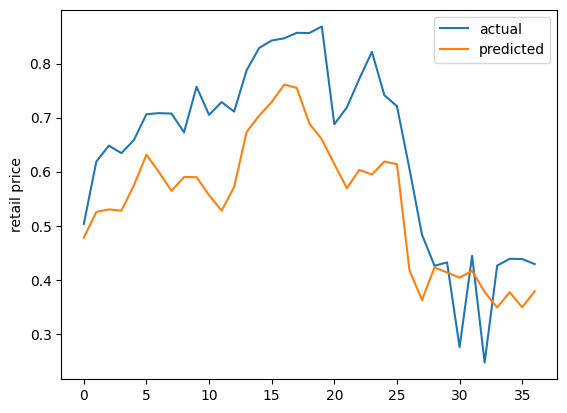

In [90]:
# 원래값으로 역스케일링한 값으로 그래프 그려보기.

plt.plot(gru_y_test_inverse, label='actual')
plt.plot(gru_y_pred_inverse, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

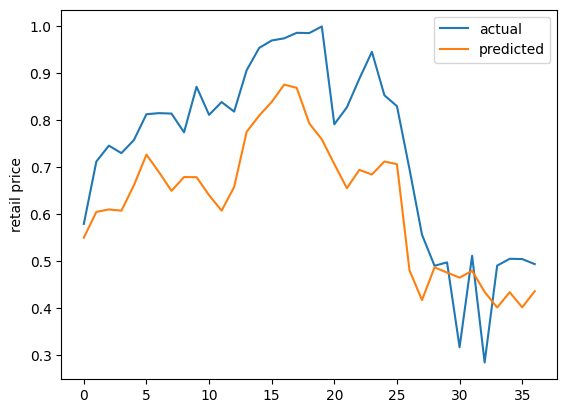

In [91]:
# 원래대로 스케일링한 값으로 그래프 그려보기.

plt.plot(y_test_np, label='actual')
plt.plot(gru_y_pred, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

# 6. RNN

In [92]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout

rnn_model = Sequential()
rnn_model.add(SimpleRNN(units=50, activation='tanh', input_shape=(4, 1)))
rnn_model.add(Dense(50, activation='tanh'))
rnn_model.add(Dropout(0.01))  
rnn_model.add(Dense(1))

# 모델 컴파일
optimizer = Adam(learning_rate=0.001)
rnn_model.compile(optimizer=optimizer, loss='mean_squared_error',metrics=['mae'])
rnn_model.summary()

C:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_2 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,201 (20.32 KB)

 Trainable params: 5,201 (20.32 KB)

 Non-trainable params: 0 (0.00 B)

In [93]:
# 모델 학습
rnn = rnn_model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), epochs=500, batch_size=10, verbose=2)

Epoch 1/500
9/9 - 4s - 459ms/step - loss: 0.0374 - mae: 0.1549 - val_loss: 0.0524 - val_mae: 0.2134
Epoch 2/500
9/9 - 0s - 16ms/step - loss: 0.0157 - mae: 0.1004 - val_loss: 0.0159 - val_mae: 0.0810
Epoch 3/500
9/9 - 0s - 9ms/step - loss: 0.0130 - mae: 0.0922 - val_loss: 0.0361 - val_mae: 0.1794
Epoch 4/500
9/9 - 0s - 21ms/step - loss: 0.0092 - mae: 0.0738 - val_loss: 0.0188 - val_mae: 0.1251
Epoch 5/500
9/9 - 0s - 9ms/step - loss: 0.0080 - mae: 0.0650 - val_loss: 0.0193 - val_mae: 0.1263
Epoch 6/500
9/9 - 0s - 7ms/step - loss: 0.0061 - mae: 0.0559 - val_loss: 0.0274 - val_mae: 0.1556
Epoch 7/500
9/9 - 0s - 7ms/step - loss: 0.0073 - mae: 0.0631 - val_loss: 0.0133 - val_mae: 0.0972
Epoch 8/500
9/9 - 0s - 7ms/step - loss: 0.0065 - mae: 0.0570 - val_loss: 0.0121 - val_mae: 0.0925
Epoch 9/500
9/9 - 0s - 7ms/step - loss: 0.0059 - mae: 0.0568 - val_loss: 0.0228 - val_mae: 0.1405
Epoch 10/500
9/9 - 0s - 7ms/step - loss: 0.0055 - mae: 0.0521 - val_loss: 0.0133 - val_mae: 0.0986
Epoch 11/500
9/

In [94]:
y_train_np = y_train.values
y_test_np = y_test.values

scaler = MinMaxScaler()
scaler.fit(y_train_np.reshape(-1, 1))

# gru 모델로 예측
rnn_y_pred = rnn_model.predict(X_test).flatten()

# 역스케일링
rnn_y_pred_inverse = scaler.inverse_transform(rnn_y_pred.reshape(-1,1))
rnn_y_test_inverse = scaler.inverse_transform(y_test_np.reshape(-1,1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step


In [95]:
# 평가치 구하기
rnn_mape = (np.sum(np.abs(rnn_y_test_inverse-rnn_y_pred_inverse)/rnn_y_test_inverse)/len(rnn_y_test_inverse))*100
rnn_mae = mean_absolute_error(y_test_np, rnn_y_pred_inverse)
rnn_rmse = np.sqrt(mean_squared_error(y_test_np, rnn_y_pred_inverse))

rnn_df = pd.DataFrame({'rnn':[rnn_mape, rnn_mae, rnn_rmse]}, index=['mape','mae','rmse'])
rnn_df

,rnn
mape,13.504002
mae,0.166621
rmse,0.180477


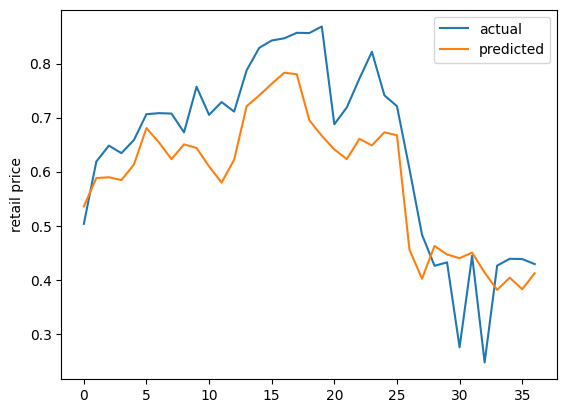

In [96]:
# 원래값으로 역스케일링한 값으로 그래프 그려보기.

plt.plot(rnn_y_test_inverse, label='actual')
plt.plot(rnn_y_pred_inverse, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()

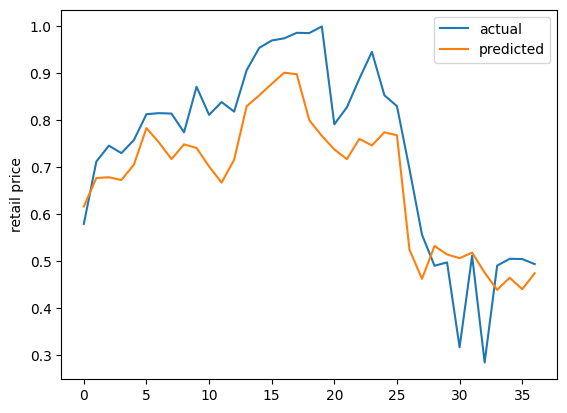

In [97]:
# 원래대로 스케일링한 값으로 그래프 그려보기.

plt.plot(y_test_np, label='actual')
plt.plot(rnn_y_pred, label='predicted')
plt.ylabel('retail price')
plt.legend()
plt.show()